## Unsupervised learning

,date,HRV (SDNN),Is at Work (binary),Is Above Mean Value,Hour of Day,Day of Week,Is Morning,t+1
0,2018-01-16 09:00:00,38.75470,1,0,9,2,1,NaN
1,2018-01-16 10:00:00,36.47938,1,0,10,2,1,38.75470
2,2018-01-16 11:00:00,34.20406,1,0,11,2,1,36.47938
3,2018-01-16 12:00:00,31.92874,1,0,12,2,0,34.20406
4,2018-01-16 13:00:00,29.65342,1,0,13,2,0,31.92874


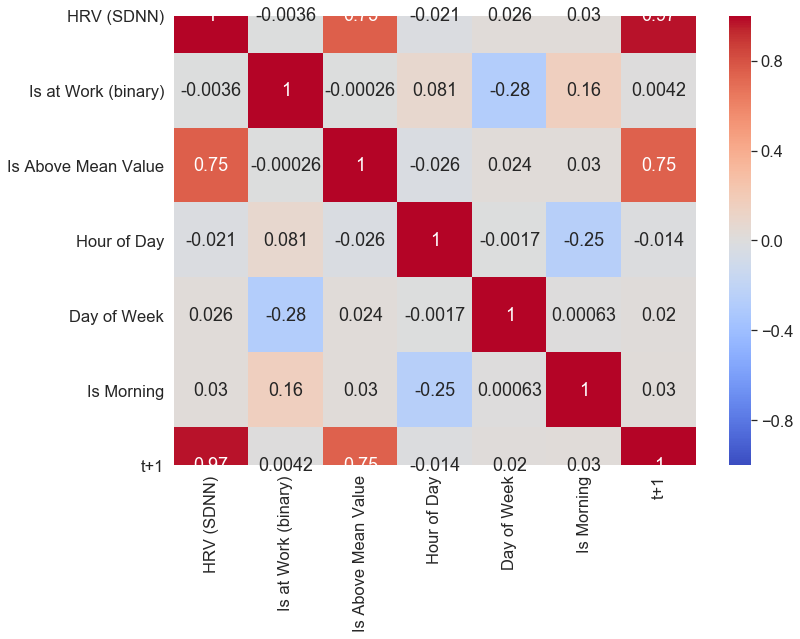

In [55]:
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
import tabulate
warnings.filterwarnings('ignore')
# sns.set(font_scale=5.5)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.5)
df_hrv = pd.read_csv("../data/original/HeartRateVariabilitySDNN.csv")

def parse_date(x):
    return pd.datetime.strptime(x[:-6],'%Y-%m-%d %H:%M:%S')

series = pd.read_csv('../data/original/HeartRateVariabilitySDNN.csv', header=0, index_col=5, parse_dates=[5], squeeze=True, date_parser=parse_date)

df_new = pd.DataFrame()
df_new['value'] = series['value'].resample('H').mean().interpolate()
df_new['creationDate'] = pd.to_datetime(df_new.index)
df_new = df_new.reset_index(drop=True)

df_new['t+1'] = df_new['value'].shift(periods=1)
df_new['t+24'] = df_new['value'].shift(periods=24)
df_new.head()

df_hrv_filtered = df_new

##### 

scaler = StandardScaler()
hrv_merged = pd.DataFrame()

def at_work(row):
#     print(row['creationDate'].hour)
    derp = row['creationDate'].hour
    hour = row['creationDate'].hour
    weekday = row['creationDate'].isoweekday()
    
    if((hour >= 9 and hour <17) and weekday < 6):
        # print(pd.to_datetime(row['creationDate']), (weekday))
        return 1
    return 0
    
# winter is from 1st of November to 1st of April
def is_winter(row):
    month = pd.to_datetime(row['creationDate'], format='%d/%m').month
    
    if(month >= 10 or month < 4):
        return 1
    return 0

def is_higher_than_mean(row):
    mean = 41.25
    if row.value > mean:
        return 1
    return 0

def get_hour_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    return hour

def get_day_of_week(row):
    weekday = pd.to_datetime(row['creationDate']).isoweekday()
    return weekday

def get_time_of_day(row):
    hour = pd.to_datetime(row['creationDate']).hour
    
    if((hour >= 6 and hour <12)):
        return 1
    return 0
    
    
hrv_merged['date'] = df_hrv_filtered['creationDate']
hrv_merged['HRV (SDNN)'] = df_hrv_filtered['value']

work_hours = []
winter_time = []
above_mean = []
hour_of_day = []
day_of_week = []
time_of_day = [] # is morning or afternoon



for (index, row) in df_hrv_filtered.iterrows():

        
    work_hours.append(at_work(row))
#     winter_time.append(is_winter(row))
    above_mean.append(is_higher_than_mean(row))
    hour_of_day.append(get_hour_of_day(row))
    day_of_week.append(get_day_of_week(row))
    time_of_day.append(get_time_of_day(row))
    if (row['value'] > 150):
        df_hrv_filtered.drop(index, inplace=True)
    
hrv_merged['Is at Work (binary)'] = work_hours
hrv_merged['Is Above Mean Value'] = above_mean
hrv_merged['Hour of Day'] = hour_of_day
hrv_merged['Day of Week'] = day_of_week
hrv_merged['Is Morning'] = time_of_day
# hrv_merged['new date'] = hrv_merged['date'].astype(np.int64).values.reshape(-1,1)
hrv_merged['t+1'] = df_hrv_filtered['t+1']

hrv_merged.to_csv('../data/hrv_shaped.csv')

sns.heatmap(hrv_merged.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

hrv_merged.head()

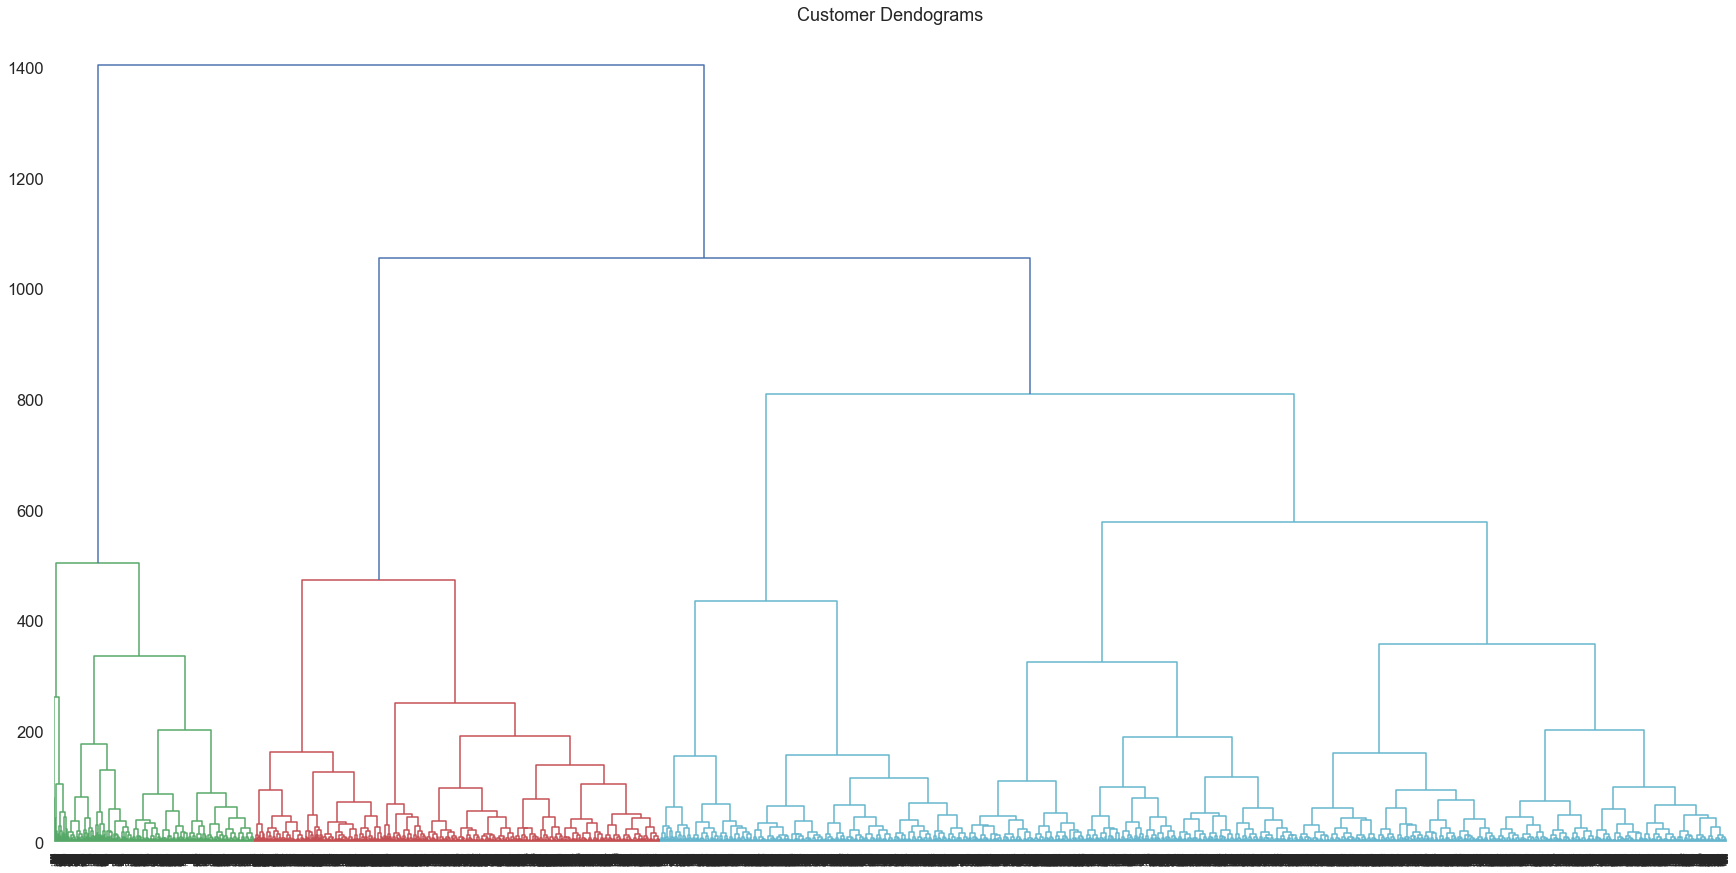

In [56]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(30, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [57]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(data)





array([0, 0, 0, ..., 0, 0, 0])

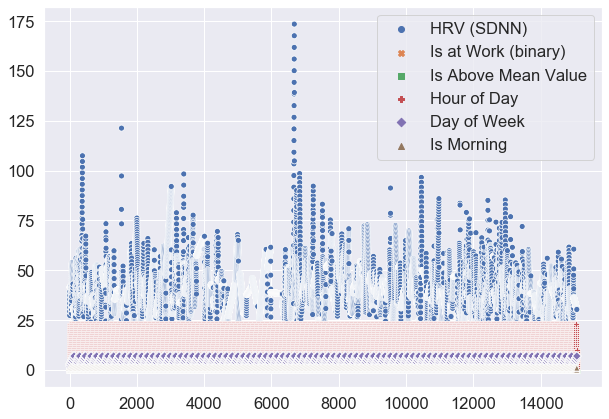

In [51]:
X = hrv_merged['HRV (SDNN)'].values.reshape(-1,1)
data = hrv_merged.iloc[:, 1:7]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data)

In [44]:




# plt.figure(figsize=(10, 7))
# plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

       HRV (SDNN)  Is at Work (binary)  Is Above Mean Value  Hour of Day  \
0       38.754700                    1                    0            9   
1       36.479380                    1                    0           10   
2       34.204060                    1                    0           11   
3       31.928740                    1                    0           12   
4       29.653420                    1                    0           13   
...           ...                  ...                  ...          ...   
15069   30.611193                    0                    0            6   
15070   30.546670                    0                    0            7   
15071   30.482147                    0                    0            8   
15072   30.417623                    0                    0            9   
15073   30.353100                    0                    0           10   

       Day of Week  Is Morning  
0                2           1  
1                2   